# Lab 10: Monte Carlo simulation

In statistical inference, it is essential to calculate probabilities and expectations. Given a probability density function $f(x)$, the probability $P(a<X<b)$ is given by an integral

$$P(a<X<b)=\int_a^bf(x)dx $$

Similarly, the expectation of a function $g(x)$ is given by

$$E(g(X))=\int_{-\infty}{\infty}g(x)f(x)dx$$

Both calculations involve integrals with respect to the probability density function $f(x)$. However, there is often no analytic solution to these integrals. We will use numerical approaches to approximate the integrals.  

## Monte carlo simulation for integrals
The integral can be approximated by Monte Carlo simulation, where the integral is treated as an expectation $E(g(X))$ of a function $g(X)$. By the law of large numbers, the expectation $E(g(X))$ can be approximated by the sample average $\overline{g(X)}$. Monte Carlo simulation involves the following steps 

```{prf:algorithm}
**Input:** the target function $g(x)$ and the density function $f(x)$

**Output:** approximation to the integral

1. Convert the integral to an expectation with respect to a probability density function $f(x)$, i.e. $\int_a^b k(x) d x=\int_a^b g(x) f(x) d x=E(g(x))$
2. Generate a random sample $x_1, \ldots, x_n$ from the probability distribution $f(x)$
3. Calculate the sample average of $\overline{g(x)}=\frac{g\left(x_1\right)+\cdots+g\left(x_n\right)}{n}$

```

```{prf:example}
:nonumber:
Calculate $\int_0^2 \log (x) e^{2x} dx$

$$
\begin{equation}
\begin{split}
\int_0^2 \log (x) e^{2x} * \frac{1}{2}*2 dx &=\int_0^2 2 \log (x) e^{2x} * \frac{1}{2} dx \\
&=\int_0^2 2\log (x) e^{2x}*f(x) dx \\
&=E(g(x))
\end{split}
\end{equation}
$$ 

where $g(x)=2 \log (x) e^{2 x}$ and $f(x)=\frac{1}{2}$ is the density function of Uniform(0, 2). Therefore, Monte Carlo simulation involves the following steps

1. generate a random sample $x_1, \ldots, x_n$ from Uniform $(0,2)$
2. calculate $g\left(x_1\right), \ldots, g\left(x_n\right)$
3. $\int_0^{2} \log (x) e^{2 x} d x \approx \frac{g\left(x_1\right)+\cdots+g\left(x_n\right)}{n}$

A large sample size $n$ indicates more accurate approximation
```

In [1]:
sample_size = 100
x = runif(sample_size, 0, 2)
gfunction = 2*log(x)*exp(2*x)
g_average = mean(gfunction)
g_average

[1] 5.322676

## Monte carlo simulation for variance
We can use Monte Carlo simulation to calculate the variance of an arbitrary estimator $\hat{\theta}=$ $g\left(x_1, \ldots, x_n\right)$, where $x_1, \ldots, x_n$ is a random sample generated from a probability distribution $f(x)$. Suppose the probability distribution $f(x)$ is given and the sample size $\mathrm{n}$ is given. Monte Carlo simulation for calculating $\operatorname{var}(\hat{\theta})$ involves the following steps

```{prf:algorithm}
1. generate multiple random samples from the probability distribution $f(x)$; each sample contains $\mathrm{n}$ observations

    sample 1: $x_1^{(1)}, \ldots, x_n^{(1)}$ \
    sample 2: $x_1^{(2)}, \ldots, x_n^{(2)}$ \
    Sample k: $x_1^{(k)}, \ldots, x_n^{(k)}$
2. for each sample, we calculate $\hat{\theta}$

    sample 1: $x_1^{(1)}, \ldots, x_n^{(1)}=>\widehat{\theta_1}$ \
    sample 2: $x_1^{(2)}, \ldots, x_n^{(2)}=>\widehat{\theta_2}$ \
    Sample k: $x_1^{(k)}, \ldots, x_n^{(k)}=>\widehat{\theta_k}$
3. finally, $\operatorname{var}(\hat{\theta}) \approx$ the sample variance of $\widehat{\theta_1}, \ldots, \widehat{\theta_k}=\frac{1}{k-1} \sum_{i=1}^k\left(\widehat{\theta_t}-\overline{\hat{\theta}}\right)^2$ where $\overline{\hat{\theta}}=$ $\frac{\widehat{\theta_1}+\cdots+\widehat{\theta_k}}{k}$
```

As an example, we use simulation to calculate the variance of the sample average for the data generated from the exponential distribution.

In [2]:
sample_size = 10
k = 1000
statistic = 1:k
for(i in 1:k){
	sample = rexp(sample_size, rate=1/5)
	statistic[i] = mean(sample)
}
var(statistic)

[1] 2.39922

## Monte carlo simulation for the null distribution of a test statistic
We can use Monte Carlo simulation to approximate the null distribution of an arbitrary test statistic $t$. Let $f(x)$ be the density function of the null model. If the density function $f(x)$ involves unknown parameters, those unknown parameters are replaced by their estimates, i.e., maximum likelihood estimates, such that we can generate random samples from the null model $f(x)$. Monte Carlo Simulation for approximating the null distribution of an arbitrary test statistic $t$ involves following steps.

```{prf:algorithm}
**Input**: the test statistic and the null hypothesis

**Output**: the null distribution of the test statistic

1. generate multiple random samples from the probability distribution $f(x)$; each sample contains $n$ observations

    sample $1: x_1^{(1)}, \ldots, x_n^{(1)}$ \
    sample $2: x_1^{(2)}, \ldots, x_n^{(2)}$ \
    .... \
    sample k: $x_1^{(k)}, \ldots, x_n^{(k)}$

2. for each sample, we calculate $t$

    sample $1: x_1^{(1)}, \ldots, x_n^{(1)}=>t_1$ \
    sample $2: x_1^{(2)}, \ldots, x_n^{(2)}=>t_2$ \
    Sample k: $x_1^{(k)}, \ldots, x_n^{(k)}=>t_k$

3. The null distribution of $t$ is approximated by $t_1, \ldots, t_k$. For example, the $95 \%$ quantile of the null distribution of $t$ is approximately equal to the $95 \%$ quantile of $t_1, \ldots, t_k$
```

Data are generated from the exponential distribution with $\lambda = 5$.

In [3]:
data = rexp(20, rate = 0.2)
t = mean(data)

We want to test if the population mean $\lambda$ is equal to 3. 

$H_0: \lambda = 3$ and $H_1: \lambda > 3$

The test statistic is the sample average $\bar{x}$. We use MC simulation to find the null distribution of the test statistic. The pvalue is equal to the

[1] "pvalue = 0"


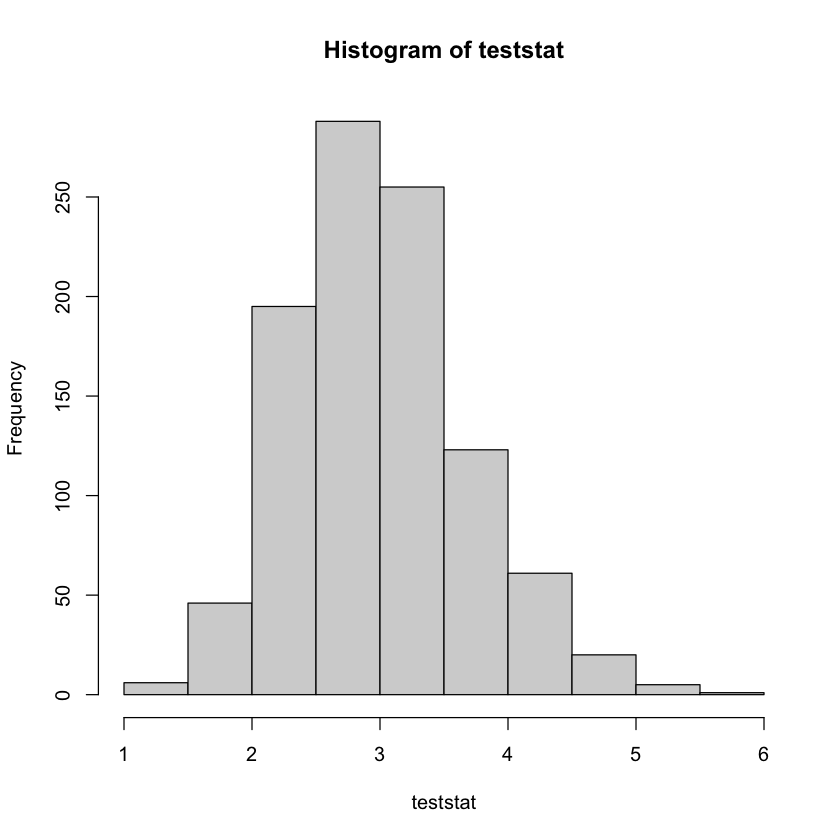

In [4]:
sample_size = 20
lambda = 3
k = 1000
teststat = 1:k
for(i in 1:k){
	sample = rexp(sample_size, rate=1/lambda)
	teststat[i] = mean(sample)
}

hist(teststat)

pvalue = sum(teststat>t)/length(teststat)
print(paste("pvalue =", pvalue))